IMPORTING LIBRARIES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


IMPORTING DATASET

In [2]:
dataset  = pd.read_csv('Salary_Data.csv')
x=dataset.iloc[:,:-1].values
y= dataset.iloc[:,-1].values
print(x)
print(y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


SPLITTIG TRAINING AND TEST DATA

In [3]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)
print(x_test)

[[ 3.7]
 [ 9.5]
 [10.3]
 [ 4.1]
 [ 2.9]
 [ 4. ]]


TRAINING


In [4]:
from sklearn.linear_model import LinearRegression
#creating a instance for the linaer regression class
regressor = LinearRegression()
#fit the model this will train the model
regressor.fit(x_train,y_train)



LinearRegression()

PREDTICT THE RESULTS

In [5]:
y_pred = regressor.predict(x_test)




VISUALIZING THE TRAINGING SET RESULTS


Text(0.5, 1.0, 'salary versue experience (training set)')

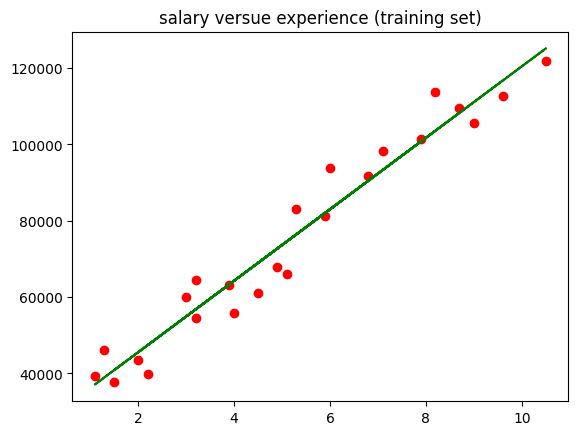

In [6]:
plt.scatter(x_train,y_train,color = 'red')
plt.plot(x_train,regressor.predict(x_train),color = 'green')
plt.title('salary versue experience (training set)')

VISUALIZING THE TEST SET RESULTS


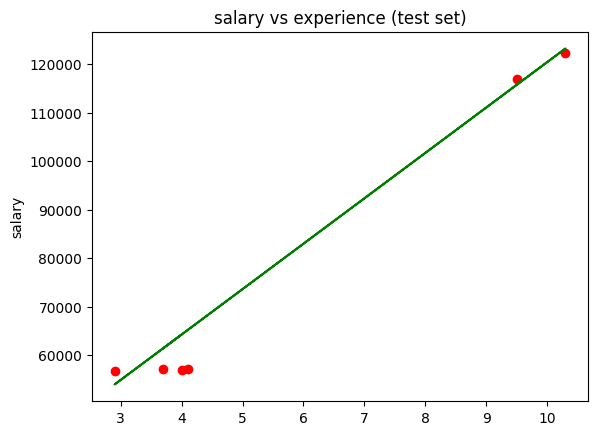

In [7]:
plt.scatter(x_test,y_test,color = 'red')
plt.plot(x_test,regressor.predict(x_test),color = "green")
plt.title('salary vs experience (test set)')
plt.ylabel('salary')
plt.show()


In [8]:
from sklearn.metrics import roc_auc_score,r2_score
print(r2_score(y_test, y_pred))

0.9720725422361338


In [9]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 5)
regressor1 = LinearRegression()
x_poly =poly_reg.fit_transform(x)
regressor1.fit(x_poly,y)



LinearRegression()

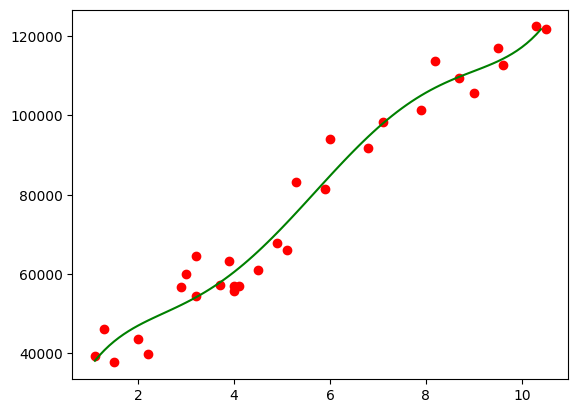

In [10]:
x_grid = np.arange(min(x),max(x),0.1)
x_grid = x_grid.reshape((len(x_grid),1))


plt.scatter(x,y,color = 'red')
plt.plot(x_grid,regressor1.predict(poly_reg.fit_transform(x_grid)),color = 'green')



In [11]:
print("normal linear regression score",r2_score(y_test,regressor.predict(x_test)))
print("polynomial linear regression score",r2_score(y_test,regressor1.predict(poly_reg.fit_transform(x_test))))

normal linear regression score 0.9720725422361338
polynomial linear regression score 0.9872124303653989


In [12]:
import joblib
joblib.dump(regressor,'My-first-linear-regression-model.h5')

['My-first-linear-regression-model.h5']

In [13]:
regressor.predict([[10]])

array([120430.22902192])

In [14]:
import modelbit
mb = modelbit.login()



In [20]:
print(regressor.predict([[6.5]]))

[87666.32165579]


In [26]:
def first_regression(num):
    answer  = regressor.predict([[num]])
    
    return answer

mb.deploy(first_regression,"My_First_deployment")

In [27]:
import requests

# API endpoint
url = "https://pugazhmukilan.ap-south-1.modelbit.com/v1/My_First_deployment/latest"

# Data to be sent in the request
data = {
    "data": 6.5 # Assuming "num" is the value you want to send
}

# Making the POST request
response = requests.post(url, json=data)

# Checking the response
if response.status_code == 200:
    print("Request successful!")
    print("Response:")
    print(response.json())  # Prints the response data
else:
    print("Error:", response.status_code)
    print("Response:", response.text)  # Prints the error message


Request successful!
Response:
{'data': [87666.32165579185]}


MODELBIT PREDICT

In [28]:
def use_modelbit(num):
    return modelbit.get_inference(
  region="ap-south-1",
  workspace="pugazhmukilan",
  deployment="My_First_deployment",
  data=num
)
    
    
    
print(use_modelbit(6.5))

{'data': [87666.32165579185]}
